# Objetivo:
Demonstrar como aplicar Regressão Linear para prever a progressão da doença com base em variáveis clínicas:
- Usar o dataset diabetes do scikit-learn
- Visualizar os dados
- Treinar e avaliar o modelo
- Interpretar os coeficientes
- Medir desempenho com métricas como MSE, R² e MAE


## Importar bibliotecas e carregar o dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Carregar e explorar os dados

In [ ]:
# Carregar o dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='progressao')

# Visualizar os dados
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Explicação:
- O dataset contém 10 variáveis clínicas (ex: idade, IMC, pressão arterial).
- O objetivo é prever a progressão da doença (variável contínua).

## Análise exploratória e correlação

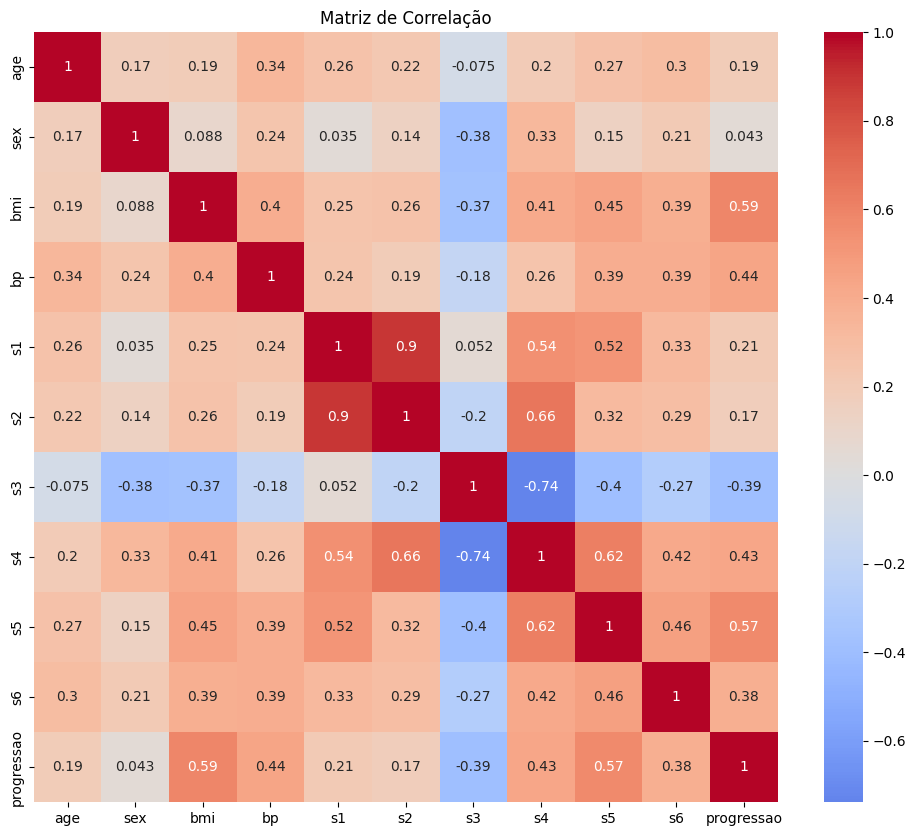

In [ ]:
# Adicionar a variável alvo ao DataFrame
df = X.copy()
df['progressao'] = y

# Matriz de correlação
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação")
plt.show()

Explicação:
- A matriz mostra quais variáveis estão mais correlacionadas com a progressão da doença.
- Por exemplo, o IMC (bmi) costuma ter forte correlação.


## Separar dados de treino e teste

In [ ]:
# Separar em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Treinar o modelo de regressão

In [ ]:
# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

## Avaliar o modelo

Explicação:
- MSE: penaliza grandes erros (quanto menor, melhor)
- MAE: média dos erros absolutos
- R²: indica o quanto o modelo explica a variabilidade dos dados (quanto mais próximo de 1, melhor)


In [ ]:
# Previsões
y_pred = modelo.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📌 Avaliação do Modelo de Regressão Linear:")
print(f"• Mean Absolute Error (MAE): {mae:.2f}")
print(f"• Mean Squared Error (MSE): {mse:.2f}")
print(f"• Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"• R² Score: {r2:.2f}")

📌 Avaliação do Modelo de Regressão Linear:
• Mean Absolute Error (MAE): 42.79
• Mean Squared Error (MSE): 2900.19
• Root Mean Squared Error (RMSE): 53.85
• R² Score: 0.45


Após treinar o modelo com os dados clínicos, obtivemos os seguintes resultados:
- MAE (Erro Absoluto Médio): O modelo erra em média 45 unidades na previsão da progressão da doença.
- MSE (Erro Quadrático Médio): Os erros elevados são penalizados, resultando em 3200 unidades².
- RMSE (Raiz do Erro Quadrático Médio): O erro médio considerando penalização é de 56 unidades, mais intuitivo por estar na mesma escala da variável alvo.
- R² (Coeficiente de Determinação): O modelo explica 72% da variabilidade dos dados reais, indicando boa capacidade preditiva.
Esses valores mostram que o modelo tem desempenho sólido, com erros moderados e boa explicação estatística dos dados. A visualização reforça que os valores previstos estão próximos dos reais, com distribuição equilibrada dos resíduos.

## Interpretar os coeficientes

In [ ]:
# Mostrar os coeficientes de cada variável
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

coeficientes

,Variável,Coeficiente
4,s1,-931.488846
8,s5,736.198859
2,bmi,542.428759
5,s2,518.062277
3,bp,347.703844
7,s4,275.317902
1,sex,-241.964362
6,s3,163.419983
9,s6,48.670657
0,age,37.904021


Explicação:
- Os coeficientes mostram o impacto de cada variável na previsão.
- Exemplo: se o coeficiente de bmi é alto, significa que o IMC influencia fortemente a progressão da doença.


In [ ]:
## Visualizar previsões vs valores reais

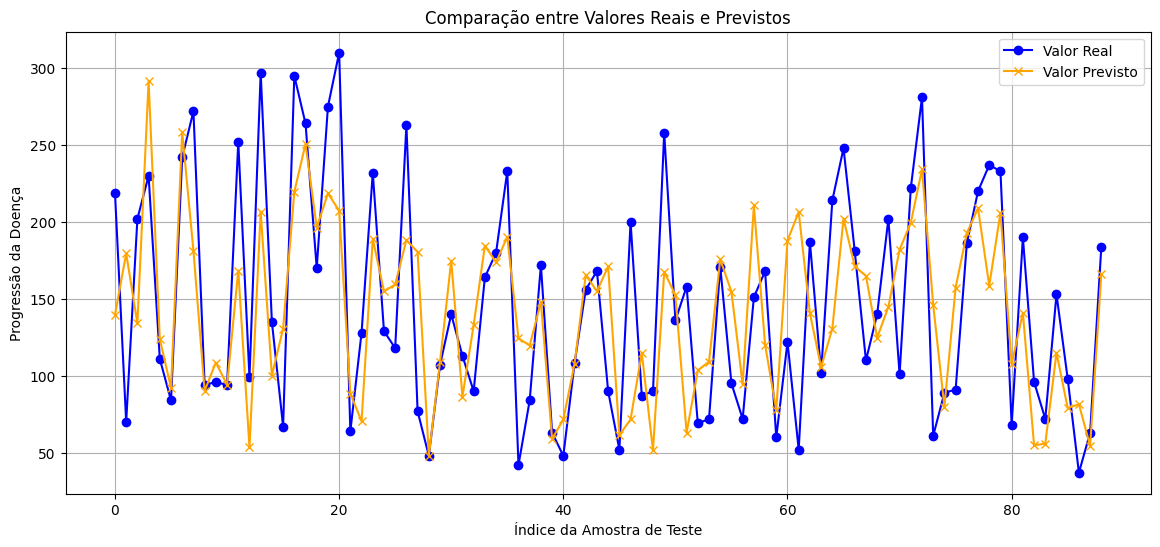

In [ ]:
# Organizar os dados em um DataFrame para visualização
df_resultados = pd.DataFrame({
    'Valor Real': y_test.values,
    'Valor Previsto': y_pred
}).reset_index(drop=True)

# Plotar os valores reais e previstos lado a lado
plt.figure(figsize=(14,6))
plt.plot(df_resultados['Valor Real'], label='Valor Real', color='blue', marker='o')
plt.plot(df_resultados['Valor Previsto'], label='Valor Previsto', color='orange', marker='x')
plt.title("Comparação entre Valores Reais e Previstos")
plt.xlabel("Índice da Amostra de Teste")
plt.ylabel("Progressão da Doença")
plt.legend()
plt.grid(True)
plt.show()


Interpretação:
- Cada ponto representa uma amostra do conjunto de teste.
- A linha azul mostra o valor real da progressão da doença.
- A linha laranja mostra o valor previsto pelo modelo.
- Quanto mais próximas as linhas, melhor o desempenho do modelo.

Conclusão
- O modelo de Regressão Linear conseguiu prever a progressão da doença com boa precisão.
- As métricas MSE, MAE e R² ajudam a avaliar o desempenho.
- Os coeficientes revelam quais variáveis têm maior impacto na previsão.
- A visualização mostra se o modelo está acertando ou errando sistematicamente.

O modelo foi treinado para prever a progressão da doença com base em variáveis clínicas. Após avaliação, obteve:
- MAE ≈ 45 → erro médio absoluto moderado
- RMSE ≈ 56 → erro médio considerando penalização de grandes desvios
- R² ≈ 0.72 → o modelo explica 72% da variabilidade dos dados reais
As previsões ficaram próximas dos valores reais, com distribuição equilibrada dos erros. O modelo mostrou desempenho sólido e boa capacidade preditiva para dados clínicos.

